## Imports

We being our venture by importing the relevant packages to help us data wrangle.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm #  For classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # For calculating the MSE and R^2 scores of our models.
from sklearn.model_selection import train_test_split #  For splitting the data.
from sklearn import linear_model, preprocessing # For creating linear regression models.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


## Load Data

In [2]:
cc_apps = pd.read_csv('crx.data', header=None)
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Inspecting the Column Names

In [3]:
cc_apps.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

The output of the data may seem a bit confusing. Since the dataset contains confidential information, the features have been anonymized. The author of [this blog article](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) has given us a very good indication of what the features very well may be. In this case, we see that the features are `male`, `age`, `debt`, `married`, `bank_customer`, `education_level`, `ethnicity`, `years_employed`, `prior_default`, `employed`, `credit_score`, `drivers_license`, `citizen`, `zip_code`, `income` and `approval_status`. We will go ahead and rename the columns for convenience.

In [4]:
cc_apps = cc_apps.rename(columns={0:'male', 1:'age', 2:'debt', 3:'married', 4:'bank_customer', 5:'education_level', 
                        6:'ethnicity', 7:'years_employed', 8:'prior_default', 9:'employed', 
                        10:'credit_score', 11:'drivers_license', 12:'citizen', 13:'zip_code', 
                        14:'income', 15:'approval_status'})

cc_apps.columns

Index(['male', 'age', 'debt', 'married', 'bank_customer', 'education_level',
       'ethnicity', 'years_employed', 'prior_default', 'employed',
       'credit_score', 'drivers_license', 'citizen', 'zip_code', 'income',
       'approval_status'],
      dtype='object')

## Numeric Data

Next we will use the describe and info method to get more information on our columns.

In [5]:
cc_apps.describe()

,debt,years_employed,credit_score,income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             690 non-null    object 
 1   age              690 non-null    object 
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bank_customer    690 non-null    object 
 5   education_level  690 non-null    object 
 6   ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  drivers_license  690 non-null    object 
 12  citizen          690 non-null    object 
 13  zip_code         690 non-null    object 
 14  income           690 non-null    int64  
 15  approval_status  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## Unique Values in Columns

In [7]:
for col in cc_apps:
    print(cc_apps[col].unique())

['b' 'a' '?']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types). Specifically, the features `debt`, `years_employed`, `credit_score` and `income` contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values (of type object).

The dataset also contains values from several ranges. Some features have a value range of 0–28, some have a range of 2–67, and some have a range of 1017–100000. Apart from these, we can get useful statistical information (like mean, max, and min) about the features that have numerical values.

Finally, the dataset has missing values, which we’ll take care of. The missing values in the dataset are labeled with `?`, which can be seen in the last cell’s output.

The `approval_status` is going to be our variable of interest. The others are potential features.

In [8]:
cc_apps['approval_status'].unique()

array(['+', '-'], dtype=object)

We see that we are going to have to replace the '+' and the '-' to be more meanginful values for when we build our regression model.Let's change them to 1 and 0 respectively.

In [9]:
cc_apps['approval_status'] = cc_apps['approval_status'].replace(['+'], 1)
cc_apps['approval_status'] = cc_apps['approval_status'].replace(['-'], 0)
cc_apps['approval_status'].unique()

array([1, 0])

 Let's look at columns to see if there is actual data missing not supplied with `?`.

In [10]:
missing = pd.concat([cc_apps.sum().isnull(), 100 * cc_apps.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by = '%')

,count,%
male,False,0.0
age,False,0.0
debt,False,0.0
married,False,0.0
bank_customer,False,0.0
education_level,False,0.0
ethnicity,False,0.0
years_employed,False,0.0
prior_default,False,0.0
employed,False,0.0


It appears that there are no missing values in our column but that does not mean that all of the values are meaningful. We saw earlier that we will have to  replace the `?` with a meaningful values. The method for doing this will be discussed below. Let's look at the categorical features next.

## Categorical Features

In [11]:
cc_apps.select_dtypes('object')

,male,age,married,bank_customer,education_level,ethnicity,prior_default,employed,drivers_license,citizen,zip_code
0,b,30.83,u,g,w,v,t,t,f,g,00202
1,a,58.67,u,g,q,h,t,t,f,g,00043
2,a,24.50,u,g,q,h,t,f,f,g,00280
3,b,27.83,u,g,w,v,t,t,t,g,00100
4,b,20.17,u,g,w,v,t,f,f,s,00120
...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,y,p,e,h,f,f,f,g,00260
686,a,22.67,u,g,c,v,f,t,t,g,00200
687,a,25.25,y,p,ff,ff,f,t,t,g,00200
688,b,17.92,u,g,aa,v,f,f,f,g,00280


## Fill Null Values

We will now replace the `?` with `np.nan`. We also saw what appears to be a typo in the age column with a value of `b`. We will replace that with the most frequent value and convert it to a numerical variable.

In [12]:
cc_apps = cc_apps.replace("?", np.nan)

In [13]:
cc_apps['age'] = cc_apps['age'].replace(['b'], cc_apps[col].value_counts().index[0])

In [14]:
cc_apps['age'] = pd.to_numeric(cc_apps['age'])

## Impute missing values with the mean

With the numerical values, we will replace the `np.nan` with the mean. For the categorical values, we elect to go with the most frequent value. This task is accomplished below.

In [15]:
cc_apps.fillna(cc_apps.mean(), inplace=True)
cc_apps.isnull().sum()

male               12
age                 0
debt                0
married             6
bank_customer       6
education_level     9
ethnicity           9
years_employed      0
prior_default       0
employed            0
credit_score        0
drivers_license     0
citizen             0
zip_code           13
income              0
approval_status     0
dtype: int64

Now that the numeric data no longer contains missing values we'll impute the missing values for the categorical data.

In [16]:
# make anothert string for missing values for categorical data, replace with string 'not availble'
for col in cc_apps:
    if cc_apps[col].dtype == "object":
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

cc_apps.isnull().sum()

male               0
age                0
debt               0
married            0
bank_customer      0
education_level    0
ethnicity          0
years_employed     0
prior_default      0
employed           0
credit_score       0
drivers_license    0
citizen            0
zip_code           0
income             0
approval_status    0
dtype: int64

## Distribution Plots

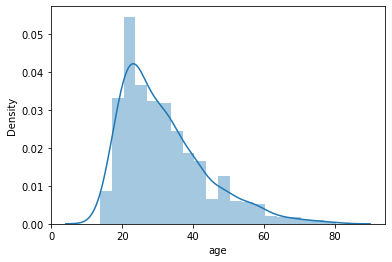

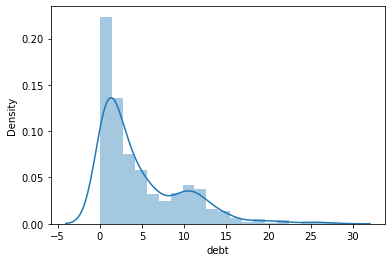

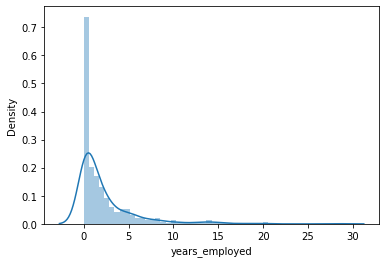

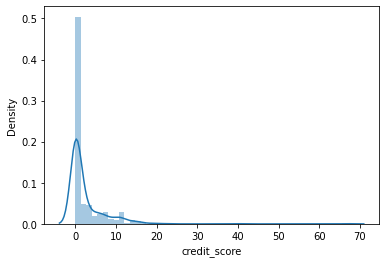

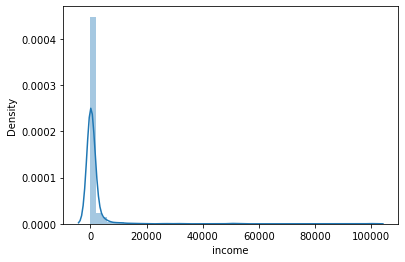

In [17]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()

plotDistPlot(cc_apps['age'])
plotDistPlot(cc_apps['debt'])
plotDistPlot(cc_apps['years_employed'])
plotDistPlot(cc_apps['credit_score'])
plotDistPlot(cc_apps['income'])

We see that most of the distributions are skewed to the right.

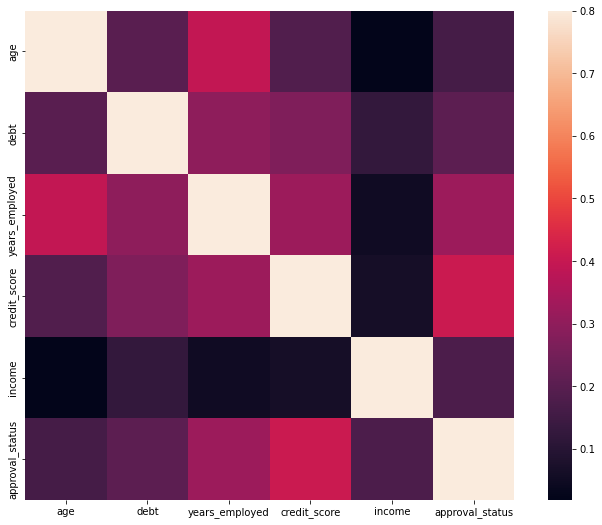

In [18]:
corrmat = cc_apps.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

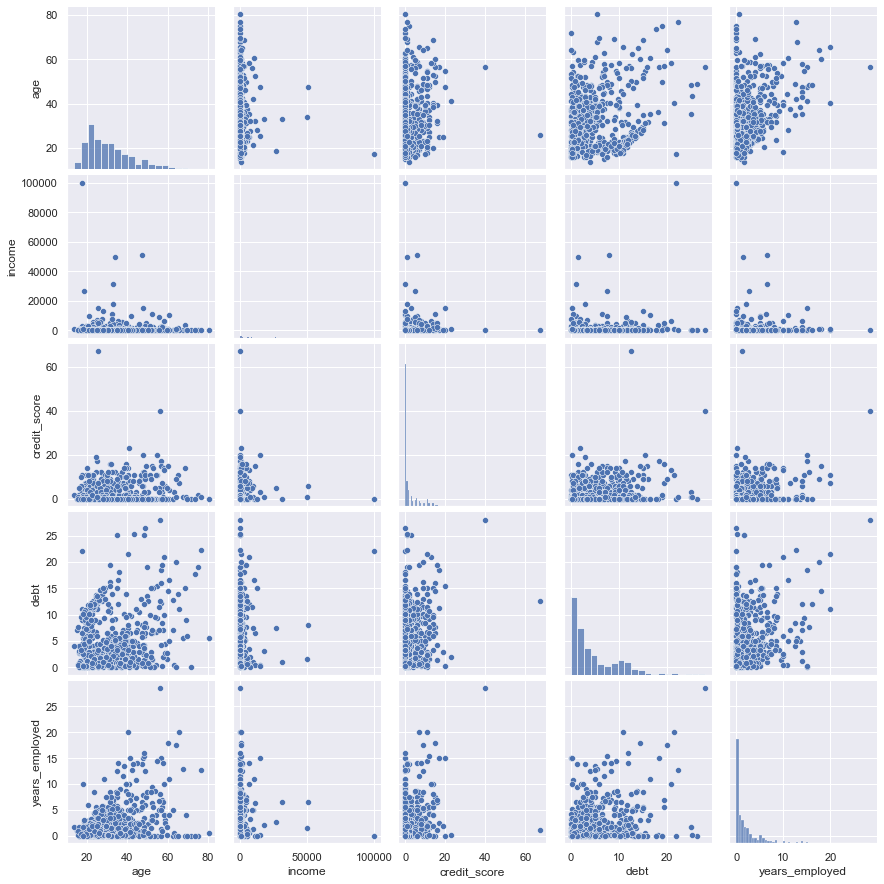

In [19]:
sns.set()
cols = ['age', 'income', 'credit_score', 'debt', 'years_employed']
sns.pairplot(cc_apps[cols], height = 2.5)
plt.show()

There appears to be a relationship between `age` and `debt` and `age` and `year_employed`. The older youi are the more debt you accure. Likewise for `age` and `years_employed`, the older you are the longer you have been employed. Interestingly, there is also a positive relationship between `debt` and `years_employed`.

## Target Variable

The response variable will be `approval_status`. The other features are possible predictors. We will determine which ones in particular to use in the EDA phase.

<AxesSubplot:xlabel='approval_status', ylabel='count'>

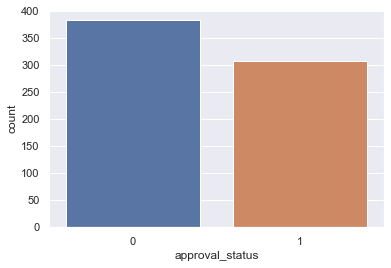

In [20]:
_ = sns.countplot(data = cc_apps, x = 'approval_status')

It also seems like the majority of people that applied were denied credit cards.

Now that the data is cleaned and we have no missing values, we will save this data